<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1>Satellite Collision Threat Classification</h1> </center>
<center><h4>Tamsin Edwards Lambourne, Vincent Johnson, Ryan Liang</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

There are thousands of pieces of debris currently orbiting our planet. These include satellites from previous launches, natural debris such as asteroid dust, and particles from collisions. For this project, data on registered satellites orbiting the earth was acquired from the Union of Concerned Scientists. The data was cleaned so that only relevant columns were included in the analysis. The data was put through unsupervised machine learning to classify the satellites into five clusters. These clusters were analyzed to give each one a crowdedness ranking, based on the amount of surface area each satellite in the cluster could take up. In our analysis, we found that the cluster closest to the earth is the most crowded.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

Over 2000 registered man-made satellites are currently orbiting the earth. Typically, when satellites are no longer used, there is no easy recovery system for them, and they end up continuing to occupy space in their orbit until it eventually decays, which can take up to a thousand years<sup>[1]</sup>. When satellites impact each other, or other space debris around, they create millions of tiny particles that are harder to track and, while small in mass, carry massive amounts of momentum and can severely damage other satellites or rockets as they fly away from the collision. These small pieces can hit other satellites, either man-made or natural, and lead to yet more collisions and space debris. 

The image below shows a snapshot of the locations of registered active satellites orbiting the earth at this time<sup>[2]</sup>. Some satellites are not listed, such as the RANGE-B satellite, a partner to the RANGE-A<sup>[3]</sup>, meaning that there are even more objects orbiting the earth and potentially causing collisions. Additionally, not all satellites can complete their missions after launch, and without communication essentially become extra debris floating through their orbits without providing useful information. 

![alt text](https://raw.githubusercontent.com/t-edw/ds3000-fp/master/stuff%20in%20space.PNG)

Our project aims to answer the questions of where the most populated orbits for satellites are, and classify the likelihood of collisions when new satellites are launched based on the anticipated orbit radius. The data on the orbital radii of satellites comes from the Union of Concerned Scientists USA<sup>[4]</sup>, and includes information such as the apogee distance, perigee distance, name, orbit type, and country of origin for over 2000 registered satellites in active use from launches up to March 31, 2019.


<b>References</b><br />
<sup>[1]</sup> <a href="https://www.spaceacademy.net.au/watch/debris/orblife.htm">Orbital Lifetimes</a><br />
<sup>[2]</sup> <a href="http://stuffin.space">Stuff In Space</a><br />
<sup>[3]</sup><a href="https://ae.gatech.edu/news/2018/12/its-space-georgia-techs-range-cubesat-launched-december-3">It's in Space! Georgia Tech's R.A.N.G.E Cubesat Launched on December 3</a><br />
<sup>[4]</sup><a href="https://www.ucsusa.org/resources/satellite-database">UCS Satellite Database</a>


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

The original dataset was downloaded from the UCS website, linked above, the csv file was stored on GitHub for easy access. The first five rows of the dataframe read from the .csv file are shown below.

The raw dataset contains many more columns and pieces of information than are necessary for our purposes, so it was necessary to clean the data and extract the more meaningful columns before beginning analysis.



In [0]:
import pandas as pd

# read the csv file
sats = pd.read_csv("https://raw.githubusercontent.com/t-edw/ds3000-fp/master/Satellite_Database_4_1_2019.csv")
sats.head()

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 27,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476.0,500.0,0.001750,97.40,95,4,NaN,NaN,11/29/2018,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,NaN,Estimated,https://spaceflightnow.com/2018/11/29/indian-r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,497.0,517.0,0.001450,97.45,94.7,5,NaN,4.5,6/23/2017,2.0,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,NaN,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/sa...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,442.0,687.0,0.017700,98.20,95.9,1,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,NaN,Space50,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,35778.0,35793.0,0.000178,0.08,1436.03,"6,330",NaN,"16,000",2/6/2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",NaN,ZARYA,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,35700.0,35700.0,0.000000,0.00,1436.1,"1,800",NaN,NaN,6/15/2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,NaN,NaN,Estimated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Variables

The satellites were grouped into clusters based on average orbital radius, eccentricity, and inclination angle using unsupervised machine learning. Average orbital radius is how far the satellite is from Earth, eccentricity is how circular the orbit of the satellite is, and inclination is the angle from the equator the satellite orbits. Once these groups were established, the dependent variable of crowdedness of the cluster was established to be used in predicting the likelihood ranking of a satellite crash.


### 2.3. Data Analysis

In our analysis, we are trying to find clusters of satellites based on each satellite's average distance from earth, orbit eccentricity, and inclination. Additionally, with the knowledge of the cluster sizes, we want to classify a newly launched satellite into a cluster and predict if it is more likely to crash into another satellite from the cluster size.

We are using unsupervised machine learning because we don't have a target variable and we don't know what the clusters are beforehand, but this is classification into a cluster group.
We are going to use k-means clustering and agglomerative clustering algorithms with 5 clusters and compare the results. We chose to use five clusters because there appeared to be five distinct clusters in the image of the satellite positions in the introduction and in the visualization of the features below. Clustering the satellites into groups based on their distance from Earth, eccentricity, and inclination seemed like the best approach for an unsupervised machine learning algorithm and for achieving our goal.
Each cluster can then provide an associated "collision risk" based on the size of the cluster in space and the number of satellites in it.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

The raw dataset includes many non-numeric columns that provide information that is not directly relevant to the analysis we are doing. Thus, before we can begin, we need to separate out only the useful columns, which in our case is the ones relating to orbital distance, inclination, and eccentricity. Names were also kept to identify satellites, but were not used in the analysis.

In [0]:
# pick out the relevant columns and drop nan values
sats = sats[["Name of Satellite, Alternate Names", "Inclination (degrees)", "Eccentricity", "Perigee (km)", "Apogee (km)"]]
sats.dropna(inplace=True)

# calculate "average" orbit radius
sats["Average Distance (km)"] = (sats["Apogee (km)"] + sats["Perigee (km)"]) / 2


features = sats[["Average Distance (km)","Inclination (degrees)", "Eccentricity"]]

sats.head()

,"Name of Satellite, Alternate Names",Inclination (degrees),Eccentricity,Perigee (km),Apogee (km),Average Distance (km)
0,3Cat-1,97.40,0.001750,476.0,500.0,488.0
1,Aalto-1,97.45,0.001450,497.0,517.0,507.0
2,AAUSat-4,98.20,0.017700,442.0,687.0,564.5
3,"ABS-2 (Koreasat-8, ST-3)",0.08,0.000178,35778.0,35793.0,35785.5
4,ABS-2A,0.00,0.000000,35700.0,35700.0,35700.0


Once the important columns were selected, the data was scaled using a MinMaxScaler. The performance of the scaled data would be compared to the unscaled data.

In [0]:
from sklearn.preprocessing import MinMaxScaler

#create the scaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(features)

#transform features based on the scaler
features_scaled = scaler.transform(features) 

### 3.2. Data Exploration


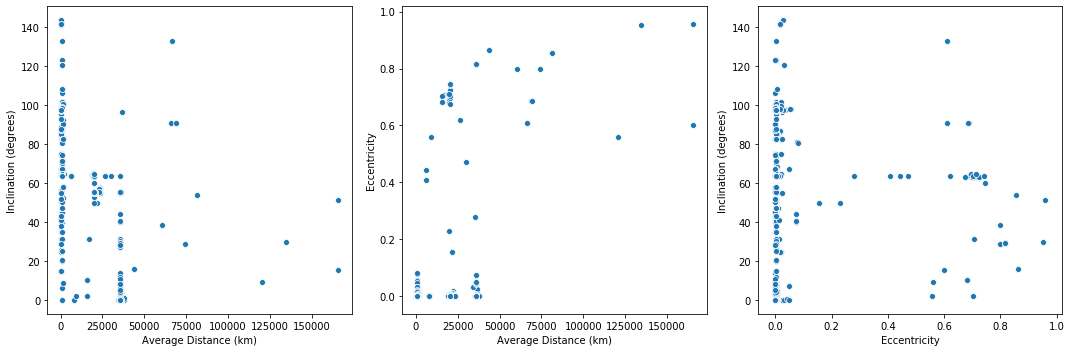

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

#Scatterplots before clustering
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

ax1 = sns.scatterplot(x="Average Distance (km)", y="Inclination (degrees)", data=sats, ax=axs[0])
ax2 = sns.scatterplot(x="Average Distance (km)", y="Eccentricity", data=sats, ax=axs[1])
ax3 = sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", data=sats, ax=axs[2])

plt.tight_layout()

The above visualizations show the three features we used, average orbit distance from earth, eccentricity, and inclination, by comparing two at a time where the points represent a satellite. Our unsupervised machine learning clustering will group the satellites, and we want the clusters to be weighted more on average distance than inclination or eccentricity. These graphs will be displayed with the clusters after the data is fitted.

### 3.3. Model Construction

A KMeans and an AgglomerativeClustering estimator were constructed to test different ways of grouping the data to identify the regions. Both estimators were constructed using 5 clusters. Furthermore, the scaled data was used with the clustering algorithms as a comparison.

In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#cluster the satellites into 5 groups based on distance, inclination, and orbit eccentricity

#instantiate the KMeans and AgglomerativeClustering estimators and request five clusters
kmeans = KMeans(n_clusters=5)
ac = AgglomerativeClustering(n_clusters=5)

#fit the data
kmeans.fit(features)
ac.fit(features)

#add assigned cluster labels for each instance to the dataset
sats["Clusters_KM"] = kmeans.labels_
sats["Clusters_AC"] = ac.labels_

sats.head()

,"Name of Satellite, Alternate Names",Inclination (degrees),Eccentricity,Perigee (km),Apogee (km),Average Distance (km),Clusters_KM,Clusters_AC
0,3Cat-1,97.40,0.001750,476.0,500.0,488.0,0,1
1,Aalto-1,97.45,0.001450,497.0,517.0,507.0,0,1
2,AAUSat-4,98.20,0.017700,442.0,687.0,564.5,0,1
3,"ABS-2 (Koreasat-8, ST-3)",0.08,0.000178,35778.0,35793.0,35785.5,1,4
4,ABS-2A,0.00,0.000000,35700.0,35700.0,35700.0,1,4


In [0]:
#cluster the satellites into 5 groups based on distance, inclination, and orbit eccentricity

#instantiate the KMeans and AgglomerativeClustering estimators and request five clusters
kmeans_scaled = KMeans(n_clusters=5)
ac_scaled = AgglomerativeClustering(n_clusters=5)

#fit the scaled data
kmeans_scaled.fit(features_scaled)
ac_scaled.fit(features_scaled)

#add assigned cluster labels for each instance to the dataset
sats["Clusters_KM_Scaled"] = kmeans_scaled.labels_
sats["Clusters_AC_Scaled"] = ac_scaled.labels_

sats.head()

,"Name of Satellite, Alternate Names",Inclination (degrees),Eccentricity,Perigee (km),Apogee (km),Average Distance (km),Clusters_KM,Clusters_AC,Clusters_KM_Scaled,Clusters_AC_Scaled
0,3Cat-1,97.40,0.001750,476.0,500.0,488.0,0,1,1,3
1,Aalto-1,97.45,0.001450,497.0,517.0,507.0,0,1,1,3
2,AAUSat-4,98.20,0.017700,442.0,687.0,564.5,0,1,1,3
3,"ABS-2 (Koreasat-8, ST-3)",0.08,0.000178,35778.0,35793.0,35785.5,1,4,2,2
4,ABS-2A,0.00,0.000000,35700.0,35700.0,35700.0,1,4,2,2


### 3.4. Model Evaluation

The kmeans and agglomerative clustering were compared by looking at the visualizations of the clusters. Similarly, the scaled versus non-scaled data clusters were also compared by looking at the visualizations of the clusters.

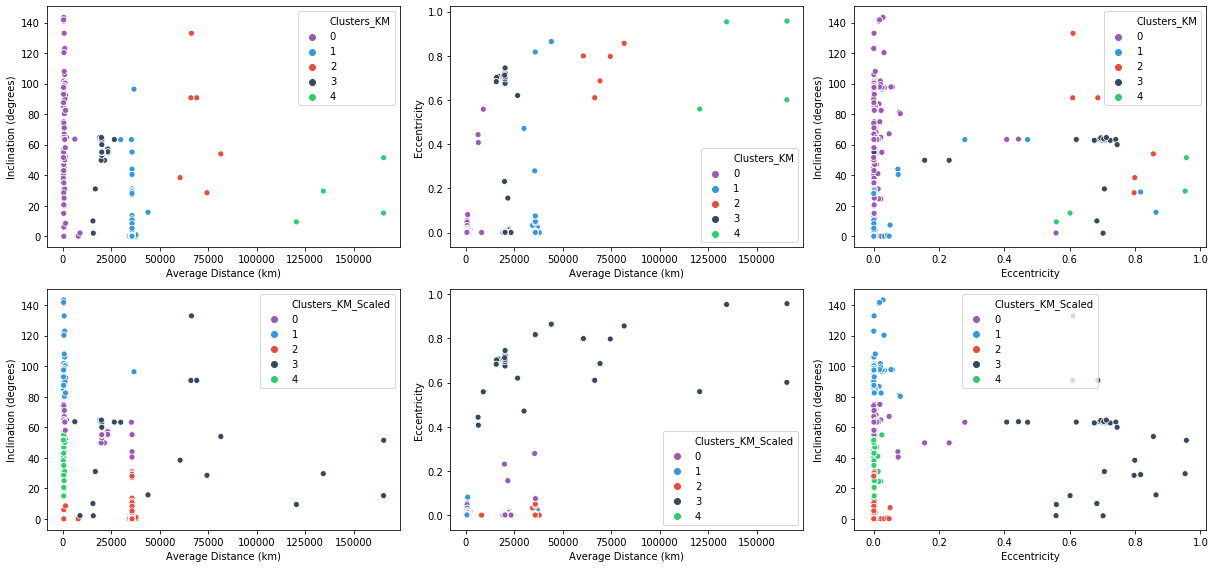

In [0]:
#Scatterplots after kmeans clustering
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(17, 8))

ax1 = sns.scatterplot(x="Average Distance (km)", y="Inclination (degrees)", hue="Clusters_KM",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][0])
ax2 = sns.scatterplot(x="Average Distance (km)", y="Inclination (degrees)", hue="Clusters_KM_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][0])

ax3 = sns.scatterplot(x="Average Distance (km)", y="Eccentricity", hue="Clusters_KM",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][1])
ax4 = sns.scatterplot(x="Average Distance (km)", y="Eccentricity", hue="Clusters_KM_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][1])

ax5 = sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", hue="Clusters_KM",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][2])
ax6 = sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", hue="Clusters_KM_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][2])

plt.tight_layout()

Above are the scatterplots with the kmeans clustering and scaled kmeans clustering. The scaled kmeans clustering appears to put less emphasis on average distance, which is more important than the other two features for our predictions, so scaling the data performs worse.

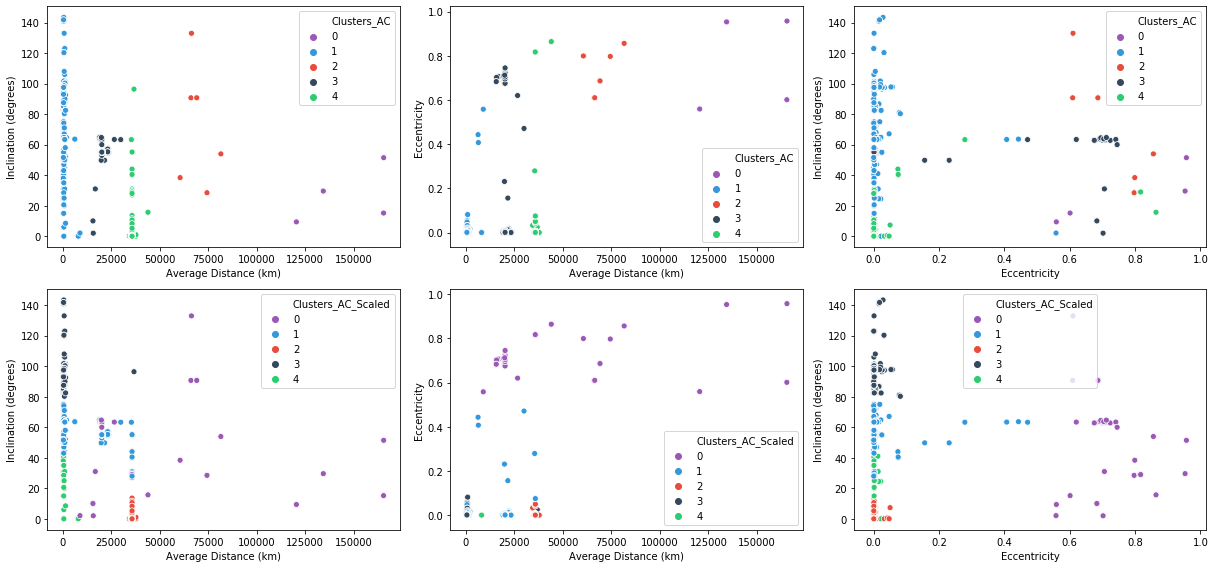

In [0]:
#Scatterplots after agglomerative clustering
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(17, 8))

ax1 = sns.scatterplot(x="Average Distance (km)", y="Inclination (degrees)", hue="Clusters_AC",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][0])
ax2 = sns.scatterplot(x="Average Distance (km)", y="Inclination (degrees)", hue="Clusters_AC_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][0])

ax3 = sns.scatterplot(x="Average Distance (km)", y="Eccentricity", hue="Clusters_AC",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][1])
ax4 = sns.scatterplot(x="Average Distance (km)", y="Eccentricity", hue="Clusters_AC_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][1])

ax5 = sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", hue="Clusters_AC",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[0][2])
ax6 = sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", hue="Clusters_AC_Scaled",
                palette=["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"], data=sats, ax=axs[1][2])

plt.tight_layout()

Above are the scatterplots with the agglomerative clustering and scaled agglomerative clustering. As shown, the results of the agglomerative clustering are very similar to kmeans clustering, with the scaled data performing worse again. Because the agglomerative clustering is so similar to kmeans, we chose to just continue with the kmeans clusters. The number of satellites in each cluster was then counted.

In [0]:
#see which groups are most crowded
counted = sats.groupby(by="Clusters_KM")["Name of Satellite, Alternate Names"].count()
counted

Clusters_KM
0    1360
1     563
2       7
3     128
4       4
Name: Name of Satellite, Alternate Names, dtype: int64

With the number of satellites in each cluster known, we needed to take into account the area that each satellite takes up to provide a ranking of how crowded that cluster was. Additional calculations were done to find the approximate surface area of the cluster and allotted area for each satellite.

In [0]:
avg_dist = sats.groupby(by="Clusters_KM")["Average Distance (km)"].mean()
min_dist = sats.groupby(by="Clusters_KM")["Average Distance (km)"].min()
max_dist = sats.groupby(by="Clusters_KM")["Average Distance (km)"].max()

stats = {'Number of Satellites in Cluster' : counted, 'Average Orbit Radius' : avg_dist, 'Minimum Orbit Radius' : min_dist, 'Maximum Orbit Radius' : max_dist}

df_clustered = pd.DataFrame(stats)
df_clustered

,Number of Satellites in Cluster,Average Orbit Radius,Minimum Orbit Radius,Maximum Orbit Radius
Clusters_KM,,,,
0,1360,755.806618,300.0,8934.5
1,563,35824.673179,29948.5,44000.0
2,7,69596.142857,60553.0,81562.5
3,128,20720.285156,15562.5,26632.5
4,4,146453.375000,120501.0,165500.0


In [0]:
import math
min_inc = sats.groupby(by="Clusters_KM")["Inclination (degrees)"].min()
max_inc = sats.groupby(by="Clusters_KM")["Inclination (degrees)"].max()

df_clustered["Range"] = df_clustered['Maximum Orbit Radius'] - df_clustered["Minimum Orbit Radius"]
df_clustered["Angular Range"] = max_inc - min_inc
df_clustered["Surface Area"] = ((max_inc - min_inc)/180)*4*math.pi*df_clustered["Average Orbit Radius"]**2

df_clustered["Radial km per Satellite"] = df_clustered["Range"]/df_clustered["Number of Satellites in Cluster"]
df_clustered["Sq. km per Satellite"] = df_clustered["Surface Area"]/df_clustered["Number of Satellites in Cluster"]

df_clustered

,Number of Satellites in Cluster,Average Orbit Radius,Minimum Orbit Radius,Maximum Orbit Radius,Range,Angular Range,Surface Area,Radial km per Satellite,Sq. km per Satellite
Clusters_KM,,,,,,,,,
0,1360,755.806618,300.0,8934.5,8634.5,143.40,5.718839e+06,6.348897,4.205029e+03
1,563,35824.673179,29948.5,44000.0,14051.5,96.40,8.637317e+09,24.958259,1.534159e+07
2,7,69596.142857,60553.0,81562.5,21009.5,104.48,3.532977e+10,3001.357143,5.047111e+09
3,128,20720.285156,15562.5,26632.5,11070.0,62.90,1.885296e+09,86.484375,1.472887e+07
4,4,146453.375000,120501.0,165500.0,44999.0,42.07,6.299537e+10,11249.750000,1.574884e+10


In [0]:
# order clusters from most crowded (1) to least crowded (5)
df_clustered.sort_values(by="Sq. km per Satellite", inplace=True)
df_clustered["Crowded Ranking"] = [1,2,3,4,5]
df_clustered.sort_index(inplace=True)
df_clustered

,Number of Satellites in Cluster,Average Orbit Radius,Minimum Orbit Radius,Maximum Orbit Radius,Range,Angular Range,Surface Area,Radial km per Satellite,Sq. km per Satellite,Crowded Ranking
Clusters_KM,,,,,,,,,,
0,1360,755.806618,300.0,8934.5,8634.5,143.40,5.718839e+06,6.348897,4.205029e+03,1
1,563,35824.673179,29948.5,44000.0,14051.5,96.40,8.637317e+09,24.958259,1.534159e+07,3
2,7,69596.142857,60553.0,81562.5,21009.5,104.48,3.532977e+10,3001.357143,5.047111e+09,4
3,128,20720.285156,15562.5,26632.5,11070.0,62.90,1.885296e+09,86.484375,1.472887e+07,2
4,4,146453.375000,120501.0,165500.0,44999.0,42.07,6.299537e+10,11249.750000,1.574884e+10,5


The "Crowded Ranking" was added to make it easier to see which clusters corresponded to the busiest ones, since the clusters on their own were not in the direct ordering of busyness.

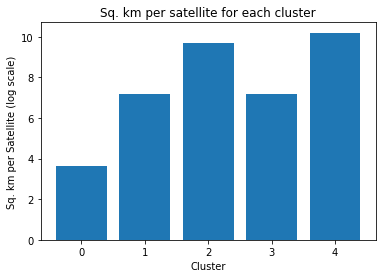

In [0]:
import numpy as np
plt.bar(df_clustered.index, np.log10(df_clustered["Sq. km per Satellite"]))
plt.title("Sq. km per satellite for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Sq. km per Satellite (log scale)")
plt.show()

The crowded ranking shows that satellites are typically more crowded the closer to earth they are. This is also shown in the bar chart above where the fewer square kilometers per satellite means that cluster is more crowded.

In [0]:
def cluster_to_rank(cluster):
    for item in df_clustered.index:
        if cluster==item:
            return df_clustered["Crowded Ranking"][item]
 

sats["Ranking"] = sats["Clusters_KM"].map(cluster_to_rank)
cleaned_sats = sats.drop(labels = ["Clusters_KM", "Clusters_AC", "Clusters_KM_Scaled", "Clusters_AC_Scaled"], axis=1)
cleaned_sats.head()

,"Name of Satellite, Alternate Names",Inclination (degrees),Eccentricity,Perigee (km),Apogee (km),Average Distance (km),Ranking
0,3Cat-1,97.40,0.001750,476.0,500.0,488.0,1
1,Aalto-1,97.45,0.001450,497.0,517.0,507.0,1
2,AAUSat-4,98.20,0.017700,442.0,687.0,564.5,1
3,"ABS-2 (Koreasat-8, ST-3)",0.08,0.000178,35778.0,35793.0,35785.5,3
4,ABS-2A,0.00,0.000000,35700.0,35700.0,35700.0,3


### 3.5. Model Optimization


We didn't really have model optimization because it is unsupervised machine learning, so we don't have the target variable that we can check for performance. The only value we could have changed was the number of clusters, but increasing that would have made the closer clusters extremely small and specific while leaving the further out clusters massive.

### 3.6. Model Testing

To test the model, we can provide the KMeans Predictor with values for a new satellite that is planned and determine which cluster it is in and thus what likelihood of collision rank it should receive. As defined above, the lower the number for the ranking, the more likely a collision would happen for a newly launched satellite into that cluster. This is demonstrated below for two satellites, one with average distance of 10000 km from earth, 45 degree inclination, and .01 eccentricity, and another with average distance of 110000 km from earth, 30 degree inclination, and .7 eccentricity. Comparing the predictions to the visualization, the predictions are working well.

In [0]:
# predicting the cluster
print("The cluster is", kmeans.predict(pd.DataFrame([(10000, 45, .01)]))[0],
      "and the likelihood of crashing rank is", cluster_to_rank(kmeans.predict(pd.DataFrame([(10000, 45, .01)]))))
print("The cluster is", kmeans.predict(pd.DataFrame([(110000, 30, .7)]))[0],
      "and the likelihood of crashing rank is", cluster_to_rank(kmeans.predict(pd.DataFrame([(110000, 30, .7)]))))

The cluster is 0 and the likelihood of crashing rank is 1
The cluster is 4 and the likelihood of crashing rank is 5


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

After cleaning the data and extracting the features, the features were visualized on a scatter plot. The unsupervised machine learning was then conducted with k-Means and agglomerative clustering for comparison, both with the features and scaled features. The clusters were visualized on the scatterplots, which allowed us to compare the results and choose the clustering that fit best with what we wanted for our predictions. The clustering that worked the best had to weigh average distance from Earth more than the other features, and both k-Means and agglomerative did that with the unscaled data. These produced extremely similar clusters so we continued with just the k-Means algorithim. With the model selected and fitted, we could then assign a ranking to each cluster about the crowdedness of the cluster.

Finally, we could predict a new satellite launch's likelihood of crashing into other satellites with the k-Means predictor. The ranking assigned is arbitrary and relative to the other rankings, we are only able to say a satellite has a higher chance of hitting another satellite or debris in one cluster than another, rather than the actual probability. Realistically, the actual probability of collisions between tracked satellites is extremely low, as all launches are carefully planned and orbits are mapped so as to avoid collisions.

In the future, this model could be improved with data on the smaller debris and previous collisions, as well as the size and speed of all bodies orbiting the Earth. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Vincent - visualizations, agglomerative clustering, explanations, and organization

Tamsin - data cleaning, model construction, and evaluation

Ryan - initial data scraping, voice over, and most of the presentation